In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras.optimizers import SGD
from keras import backend as K

from sklearn.model_selection import train_test_split

In [ ]:
# Read Data
# bodyswing_df = pd.read_csv("boxing.txt")
# handswing_df = pd.read_csv("handclapping.txt")

bodyswing_df = pd.read_csv("boxing.txt")
handswing_df = pd.read_csv("handclapping.txt")
handwaving_df = pd.read_csv("handwaving.txt")
jogging_df = pd.read_csv("jogging.txt")
running_df = pd.read_csv("running.txt")
walking_df = pd.read_csv("walking.txt")

print(bodyswing_df.shape, handswing_df.shape, handwaving_df.shape, jogging_df.shape, running_df.shape)

(45187, 52) (42667, 52) (53678, 52) (43884, 52) (38505, 52)


In [ ]:
X = []
y = []
no_of_timesteps = 10

dataset = bodyswing_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append(1)

dataset = handswing_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append(0)

dataset = handwaving_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append(2)

dataset = jogging_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append(3)

dataset = running_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append(4)

dataset = walking_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append(5)

X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(289656, 10, 51) (289656,)
(231724, 10, 51) (231724,) (57932, 10, 51) (57932,)


In [ ]:
model  = Sequential()
model.add(LSTM(units = 256, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 32, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 16))
model.add(Dropout(0.2))
# model.add(Dense(units = 512, activation="relu"))
# model.add(Dense(units = 256, activation="relu"))
model.add(Dense(units = 64, activation="relu"))
model.add(Dense(units = 6, activation="sigmoid"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 256)             │         315,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10, 64)              │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 10, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 939,910 (3.59 MB)

 Trainable params: 939,910 (3.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model.compile(optimizer="adam", metrics = ['accuracy'], loss = "categorical_crossentropy")

# history = model.fit(X_train, y_train, epochs=32, batch_size=1024,validation_data=(X_test, y_test))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming your y has unique values (0, 1, 2)
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Now use y_train_encoded and y_test_encoded for training
model.compile(optimizer="adam", metrics=['accuracy'], loss="categorical_crossentropy")
history = model.fit(X_train, y_train_encoded, epochs=128, batch_size=2048, validation_data=(X_test, y_test_encoded))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/128
114/114 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.3693 - loss: 1.4723 - val_accuracy: 0.5319 - val_loss: 0.9876
Epoch 2/128
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5426 - loss: 0.9540 - val_accuracy: 0.5555 - val_loss: 0.9757
Epoch 3/128
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.6035 - loss: 0.8569 - val_accuracy: 0.6595 - val_loss: 0.7049
Epoch 4/128
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.6513 - loss: 0.7286 - val_accuracy: 0.6863 - val_loss: 0.6322
Epoch 5/128
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.6827 - loss: 0.6513 - val_accuracy: 0.6494 - val_loss: 0.7874
Epoch 6/128
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.6830 - loss: 0.6531 - val_accuracy: 0.6973 - val_loss: 0.5918
Epoch 7/128
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.7094 - loss: 0.5820 - val_accuracy: 0.7375 - val_loss: 0.5315
Epoch 8/128
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.7294 - loss: 0.553

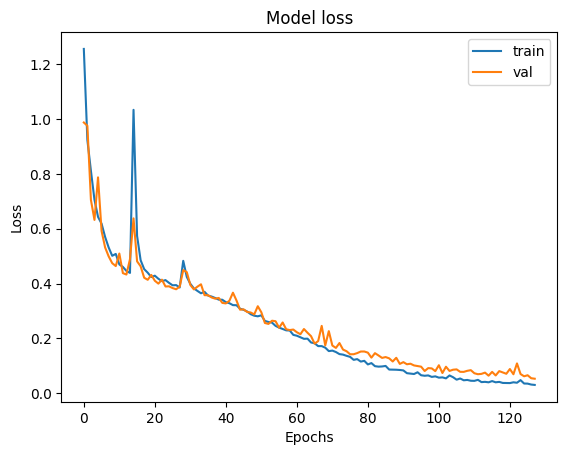

In [ ]:
# Visualize the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

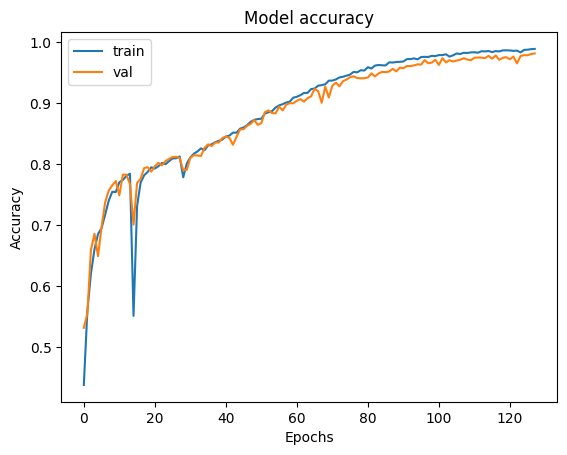

In [ ]:
# Visualize the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1811/1811 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Accuracy: 0.9818753020782987
Recall: 0.9818753020782987
Precision: 0.981913293141799
F1-score: 0.9818869161621853
Confusion Matrix:
 [[ 8429     2     7     0     0     0]
 [    4  9054     1     0     0     1]
 [   16     4 10764     0     0     0]
 [    0     0     0  8518   247   161]
 [    0     0     0   171  7402   100]
 [    0     0     0   213   123 12715]]


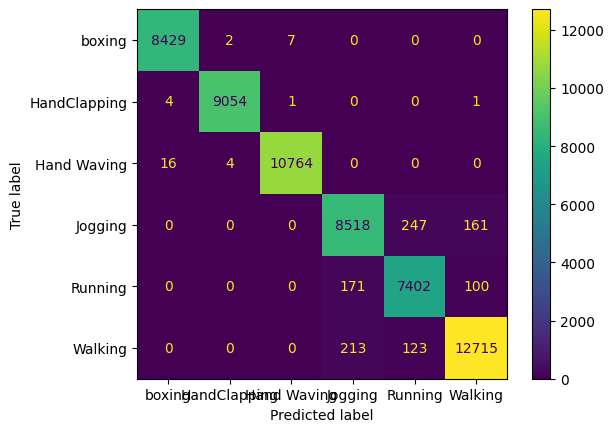

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)  # Get predicted class labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class, average='weighted')  # Micro-averaging for multi-class
precision = precision_score(y_test, y_pred_class, average='weighted')
f1_score = f1_score(y_test, y_pred_class, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1_score)
print("Confusion Matrix:\n", cm)

ConfusionMatrixDisplay(cm, display_labels = ["boxing", "HandClapping", "Hand Waving", "Jogging", "Running", "Walking"]).plot()
plt.show()

In [ ]:
model.save("model.h5")